In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#df = pd.read_feather('/kaggle/input/nos-news-articles-2015-2024oct/NOS_NL_articles_2015_mar_2025.feather') OLD

#read dataset / latest version: sept 2025 
df = pd.read_feather("C:\\Users\\Max van der Slot\\Downloads\\NOS_NL_articles_2015_jul_2025.feather")

# Ensure 'published_time' column is in datetime format
df['published_time'] = pd.to_datetime(df['published_time'])

# Display last three rows
df.tail(3)

,channel,url,type,title,keywords,section,description,published_time,modified_time,image,content
296931,nos,https://nos.nl/artikel/2577138,article,Meer dan 70 verwaarloosde honden weggehaald ui...,"verwaarloosde dieren, Oosterwolde",Regionaal nieuws,De honden zijn naar een opvanglocatie gebracht...,2025-07-31 22:43:35,2025-07-31 22:43:35,https://cdn.nos.nl/image/2025/07/31/1255340/10...,<h1>Meer dan 70 verwaarloosde honden weggehaal...
296932,nos,https://nos.nl/artikel/2577139,article,Vitesse is geen profclub meer: 'Niemand kan ge...,"Vitesse, voetbal",Voetbal,Vitesse is door de uitspraak van de beroepscom...,2025-07-31 22:45:18,2025-07-31 23:19:15,https://cdn.nos.nl/image/2025/08/01/1255453/10...,<h1>Vitesse is geen profclub meer: 'Niemand ka...
296933,nos,https://nos.nl/artikel/2577141,article,Vijf van de zes Nederlandse beachvolleybalkopp...,"EK beachvolleybal, beachvolleybal",Beachvolleybal,Vijf van de zes Nederlandse beachvolleybalkopp...,2025-07-31 23:14:19,2025-07-31 23:14:19,https://cdn.nos.nl/image/2025/07/31/1255347/10...,<h1>Vijf van de zes Nederlandse beachvolleybal...


In [13]:
# Count the number of rows
total_rows = len(df)

# Count the number of rows after filtering on nos-channel (and remove nieuwsuur-articles)
df = df[(df['channel'] == 'nos')]

total_rows_filtered = len(df)

print("Total number of rows:", total_rows, "\nFiltered ('nos' channel): ", total_rows_filtered)

Total number of rows: 296934 
Filtered ('nos' channel):  287018


In [14]:
count_article = df[df['type'] == 'article'].shape[0]
count_liveblog = df[df['type'] == 'liveblog'].shape[0]

print("number of articles: ", count_article)
print("number of liveblogs: ", count_liveblog)

number of articles:  282275
number of liveblogs:  4743


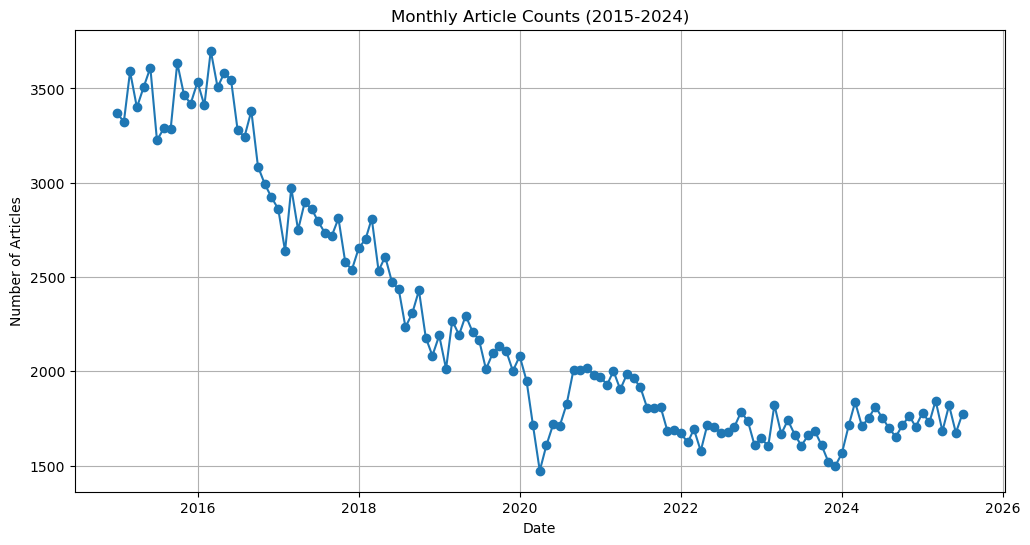

In [15]:
# Extract the year and month from 'published_time' as a new column in YYYY-MM format
df['year_month'] = df['published_time'].dt.to_period('M')

# Count the number of articles per month
monthly_counts = df.groupby('year_month').size()

# Convert to DataFrame for plotting
monthly_counts_df = monthly_counts.reset_index(name='article_count')
monthly_counts_df['year_month'] = monthly_counts_df['year_month'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df['year_month'], monthly_counts_df['article_count'], marker='o')
plt.title("Monthly Article Counts (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

In [16]:
# Define the specific timestamp to filter
specific_time = "2024-10-12 12:06:43"

# Filter the dataframe for the exact published_time and select only the desired columns
row_specific_time = df[df['published_time'] == specific_time][['content']]

# Print the selected columns in a tabular format
print(row_specific_time.to_string(index=False))

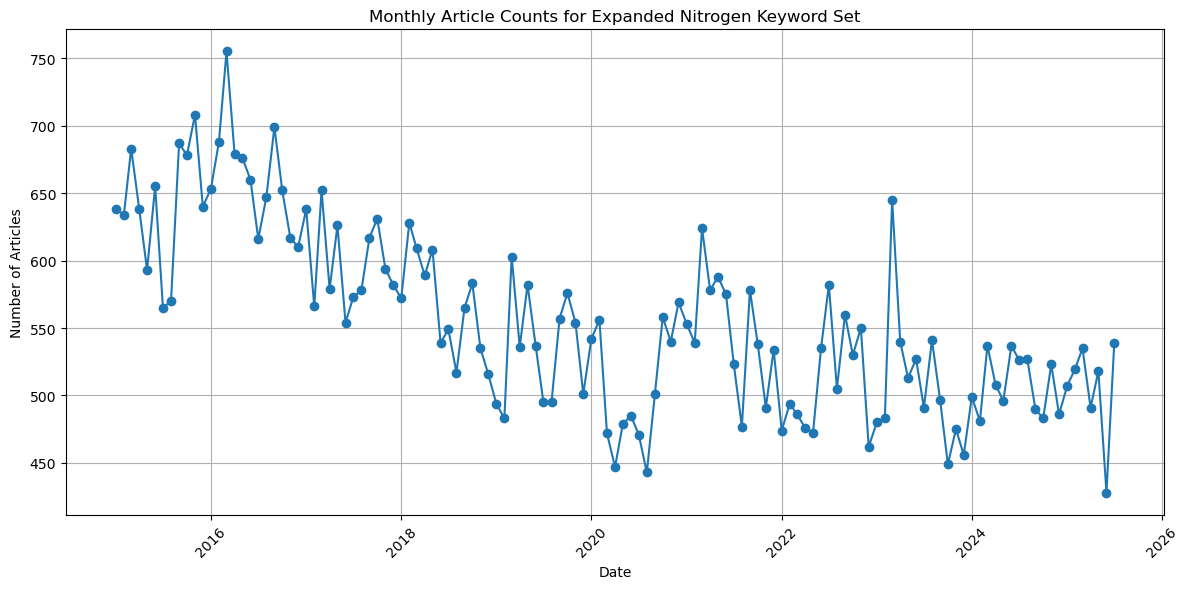

Total matched articles: 70569


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

search_words = [
    "stikstof",
    "stikstofcrisis",
    "stikstofbeleid",
    "stikstofprobleem",
    "stikstofmaatregelen",
    "PAS",
    "Programma Aanpak Stikstof",
    "stikstofnormen",
    "boerenprotest",
    "uitkoopregeling boeren",
    "stikstofreductie",
    "emissiearme stallen"
]

# Maak 1 regex-patroon van alle keywords (OR)
pattern = "|".join(search_words)

# Kolommen waarin je wil zoeken
cols = ["title", "keywords", "section", "description", "content"]

# Filter: match als 1 van de keywords voorkomt in 1 van de kolommen
mask = False
for c in cols:
    mask = mask | df[c].astype(str).str.contains(pattern, case=False, na=False, regex=True)

df_filtered = df[mask].copy()

# Monthly grouping
df_filtered["published_time"] = pd.to_datetime(df_filtered["published_time"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["published_time"])
df_filtered["year_month"] = df_filtered["published_time"].dt.to_period("M")

monthly_counts = df_filtered.groupby("year_month").size()
monthly_counts_df = monthly_counts.reset_index(name="article_count")
monthly_counts_df["year_month"] = monthly_counts_df["year_month"].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df["year_month"], monthly_counts_df["article_count"], marker="o", linestyle="-")
plt.title("Monthly Article Counts for Expanded Nitrogen Keyword Set")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total matched articles:", len(df_filtered))


In [22]:
import pandas as pd

# 1) Read the Google Trends export (first row is usually metadata)
df_trends = pd.read_csv(
    r"C:\Users\Max van der Slot\Downloads\multiTimeline.csv",
    skiprows=1
)

# 2) Kijk even hoeveel kolommen je hebt
print("Columns found:", list(df_trends.columns))

# 3) Neem de eerste kolom als datum, en de eerste niet-datum kolom als trends
date_col = df_trends.columns[0]

# Soms heet die tweede kolom bv. "stikstof: (Netherlands)"
value_col = df_trends.columns[1]

# 4) Maak een schone trends-df met precies 2 kolommen
df_trends = df_trends[[date_col, value_col]].copy()
df_trends = df_trends.rename(columns={date_col: "date", value_col: "Google_Trends_index"})

# 5) Datetime + opschonen
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

# 6) (optioneel) Maak index numeric (soms staat er "<1")
df_trends["Google_Trends_index"] = (
    df_trends["Google_Trends_index"]
    .astype(str)
    .str.replace("<1", "0", regex=False)
)
df_trends["Google_Trends_index"] = pd.to_numeric(df_trends["Google_Trends_index"], errors="coerce")

display(df_trends.head())
display(df_trends.tail())


Columns found: ['Maand', 'Stikstof: (Nederland)', 'Stikstofcrisis: (Nederland)', 'Stikstofbeleid: (Nederland)', 'Stikstofprobleem: (Nederland)', 'Stikstofmaatregelen: (Nederland)']


,date,Google_Trends_index
0,2015-01-01,12
1,2015-02-01,14
2,2015-03-01,15
3,2015-04-01,14
4,2015-05-01,13


,date,Google_Trends_index
124,2025-05-01,16
125,2025-06-01,16
126,2025-07-01,13
127,2025-08-01,13
128,2025-09-01,16


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Gebruik je gefilterde NOS data
df_nos = df_filtered.copy()

# Datetime check
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

# Maak maand-periode
df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

# Tel artikelen per maand
nos_monthly = (
    df_nos
    .groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)

# Maak timestamp voor plotting / merge
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()

display(nos_monthly.head())
display(nos_monthly.tail())


,year_month,NOS_article_count,date
0,2015-01,638,2015-01-01
1,2015-02,634,2015-02-01
2,2015-03,683,2015-03-01
3,2015-04,638,2015-04-01
4,2015-05,593,2015-05-01


,year_month,NOS_article_count,date
122,2025-03,535,2025-03-01
123,2025-04,491,2025-04-01
124,2025-05,518,2025-05-01
125,2025-06,428,2025-06-01
126,2025-07,539,2025-07-01


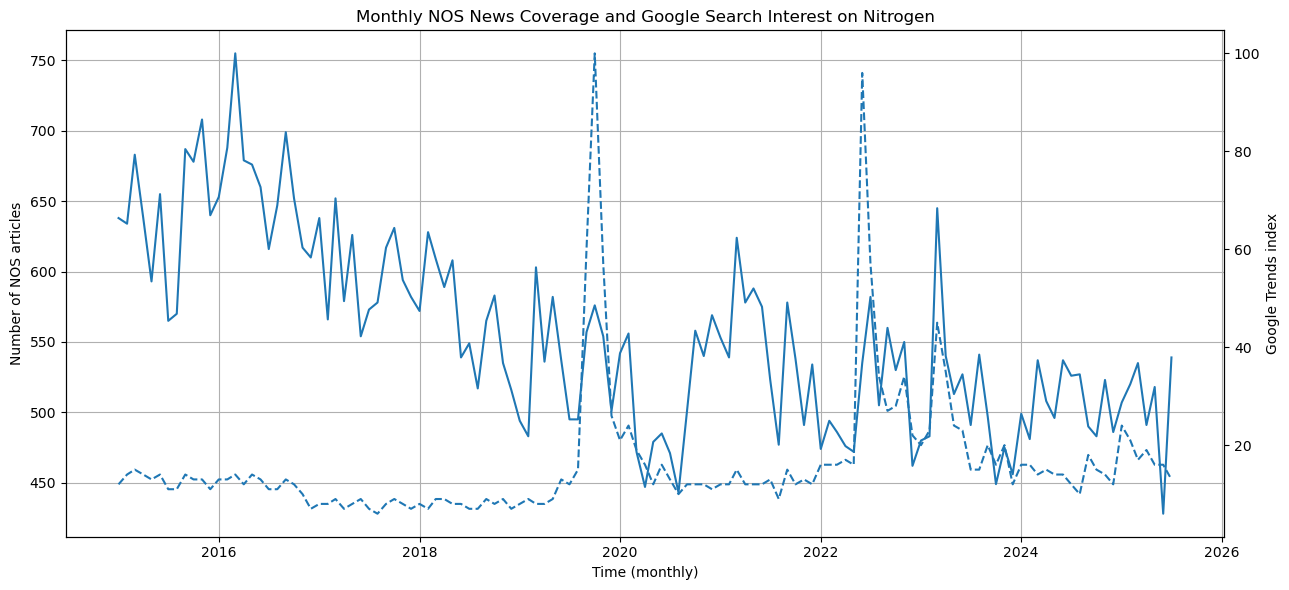

Date range: 2015-01-01 00:00:00 to 2025-07-01 00:00:00
Number of months: 127


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) NOS artikelen -> maandelijkse telling
# -----------------------------
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos
    .groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)

nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()

# -----------------------------
# 2) Google Trends (al maandelijks)
# -----------------------------
df_gt = df_trends.copy()
df_gt["date"] = pd.to_datetime(df_gt["date"], errors="coerce")
df_gt = df_gt.dropna(subset=["date"])

# -----------------------------
# 3) Combineer op maand
# -----------------------------
combined = pd.merge(
    nos_monthly[["date", "NOS_article_count"]],
    df_gt[["date", "Google_Trends_index"]],
    on="date",
    how="inner"
).sort_values("date")

# -----------------------------
# 4) Gecombineerde time-series plot (2 y-assen)
# -----------------------------
fig, ax1 = plt.subplots(figsize=(13, 6))

# Linker y-as: NOS
ax1.plot(
    combined["date"],
    combined["NOS_article_count"],
    label="NOS articles"
)
ax1.set_xlabel("Time (monthly)")
ax1.set_ylabel("Number of NOS articles")
ax1.grid(True)

# Rechter y-as: Google Trends
ax2 = ax1.twinx()
ax2.plot(
    combined["date"],
    combined["Google_Trends_index"],
    label="Google Trends",
    linestyle="--"
)
ax2.set_ylabel("Google Trends index")

plt.title("Monthly NOS News Coverage and Google Search Interest on Nitrogen")
fig.tight_layout()
plt.show()

# Sanity check
print("Date range:", combined["date"].min(), "to", combined["date"].max())
print("Number of months:", len(combined))


Trends term columns used: ['Stikstof: (Nederland)', 'Stikstofcrisis: (Nederland)', 'Stikstofbeleid: (Nederland)', 'Stikstofprobleem: (Nederland)', 'Stikstofmaatregelen: (Nederland)']
Date range: 2015-01-01 00:00:00 to 2025-07-01 00:00:00
Number of months: 127


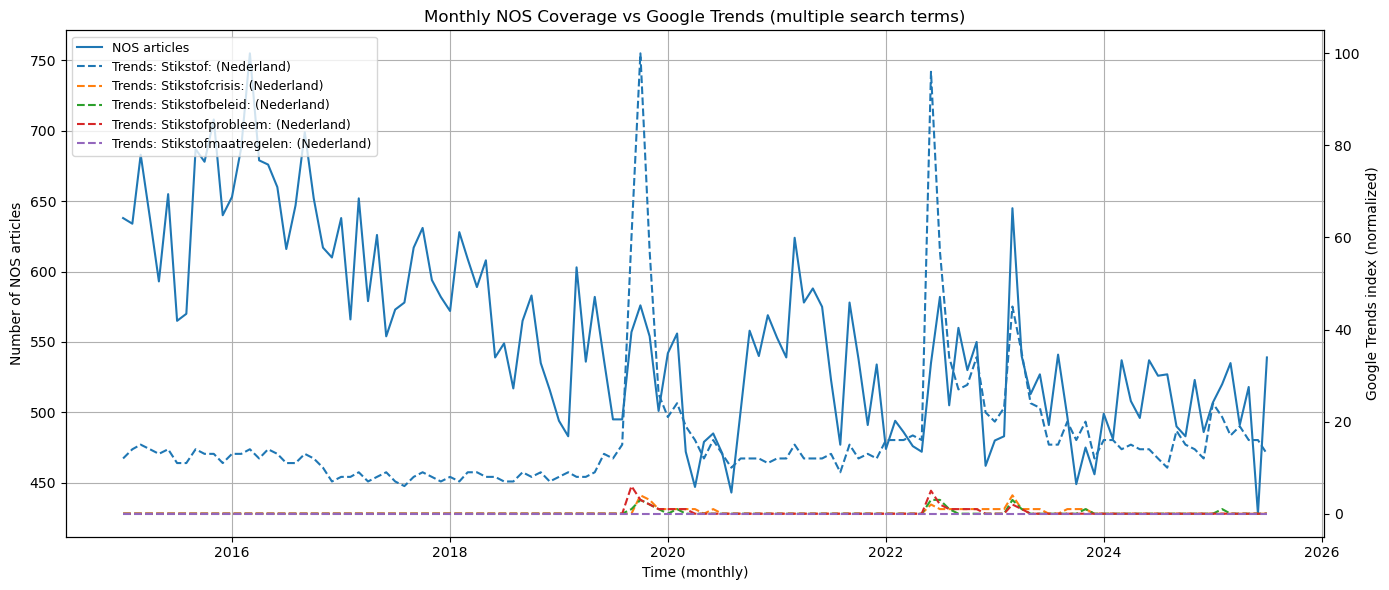

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 0) INPUT PATHS (pas deze paden aan)
# =========================================================
TRENDS_PATH = r"C:\Users\Max van der Slot\Downloads\multiTimeline.csv"

# df_filtered moet al bestaan (jullie gefilterde NOS-artikelen)
# en moet een kolom 'published_time' hebben (datetime of convertible).

# =========================================================
# 1) NOS -> maandelijkse telling
# =========================================================
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)

nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly[["date", "NOS_article_count"]].sort_values("date")

# =========================================================
# 2) Google Trends -> meerdere zoektermen inladen + opschonen
#    (werkt voor exports met meerdere kolommen)
# =========================================================
df_trends_raw = pd.read_csv(TRENDS_PATH, skiprows=1)

# Eerste kolom is datum (meestal "Week" of "Month")
date_col = df_trends_raw.columns[0]
term_cols = list(df_trends_raw.columns[1:])  # alle zoektermen/series

df_trends = df_trends_raw[[date_col] + term_cols].copy()
df_trends = df_trends.rename(columns={date_col: "date"})
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

# '<1' -> 0 en naar numeric
for c in term_cols:
    df_trends[c] = (
        df_trends[c].astype(str)
        .str.replace("<1", "0", regex=False)
    )
    df_trends[c] = pd.to_numeric(df_trends[c], errors="coerce")

# (optioneel) verwijder kolommen die helemaal leeg zijn
term_cols = [c for c in term_cols if df_trends[c].notna().any()]

# =========================================================
# 3) Merge NOS + Trends op maand (date)
# =========================================================
combined = pd.merge(
    nos_monthly,
    df_trends[["date"] + term_cols],
    on="date",
    how="inner"
).sort_values("date")

print("Trends term columns used:", term_cols)
print("Date range:", combined["date"].min(), "to", combined["date"].max())
print("Number of months:", len(combined))

# =========================================================
# 4) Plot: NOS (linker y-as) + meerdere Trends lijnen (rechter y-as)
# =========================================================
fig, ax1 = plt.subplots(figsize=(14, 6))

# NOS on left axis
ax1.plot(combined["date"], combined["NOS_article_count"], label="NOS articles")
ax1.set_xlabel("Time (monthly)")
ax1.set_ylabel("Number of NOS articles")
ax1.grid(True)

# Trends on right axis
ax2 = ax1.twinx()
for c in term_cols:
    ax2.plot(combined["date"], combined[c], linestyle="--", label=f"Trends: {c}")
ax2.set_ylabel("Google Trends index (normalized)")

plt.title("Monthly NOS Coverage vs Google Trends (multiple search terms)")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=9)

fig.tight_layout()
plt.show()
